In [45]:
import pandas as pd
import re
import os
import json
import time
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [46]:
creditcard = pd.read_csv("creditcard.csv", sep=",")

In [47]:
creditcard.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [48]:
type(creditcard)

pandas.core.frame.DataFrame

In [49]:
X = creditcard.iloc[:,0:29]
y = creditcard.iloc[:,30]

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [55]:
model = LogisticRegression(max_iter=50000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[85283,    13],
       [   63,    84]])

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9991105181231933


<function matplotlib.pyplot.show(close=None, block=None)>

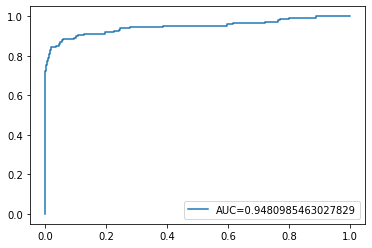

In [60]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show